# <center> $\color{darkblue} {\text{Digit Recognizer}}$ </center>

### <center> $\color{darkblue} {\text{Wala TOUHAMI}}$ </center>

---

__Goal:__ is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from __regression__ to __neural networks__. 

__Data Description__

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

FILE FORMATS FOR THE MNIST DATABASE

The data is stored in a very simple file format designed for storing vectors and multidimensional matrices. General info on this format is given at the end of this page, but you don't need to read that to use the data files.
All the integers in the files are stored in the MSB first (high endian) format used by most non-Intel processors. Users of Intel processors and other low-endian machines must flip the bytes of the header.

There are 4 files:

- train-images-idx3-ubyte: training set images
- train-labels-idx1-ubyte: training set labels
- t10k-images-idx3-ubyte:  test set images
- t10k-labels-idx1-ubyte:  test set labels

The training set contains 60000 examples, and the test set 10000 examples.




___

# $\color{darkblue} {\text{Libraries Importing}}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
#from sklearn.preprocessing import t
from sklearn.metrics import accuracy_score
#import cv2
import struct as st

#  $\color{darkblue} {\text{1. Data loading}}$ 

idx format

The magic number is an integer (MSB first). The first 2 bytes are always 0.
The third byte codes the type of the data:
0x08: unsigned byte
0x09: signed byte
0x0B: short (2 bytes)
0x0C: int (4 bytes)
0x0D: float (4 bytes)
0x0E: double (8 bytes)
The 4-th byte codes the number of dimensions of the vector/matrix: 1 for vectors, 2 for matrices….


In [2]:
# This code is partially based on
# the following GitHub repo:
# https://github.com/sadimanna/idx2numpy_array
# and this well written Medium article:
# https://medium.com/@mannasiladittya/converting-mnist-data-in-idx-format-to-python-numpy-array-5cb9126f99f1
# which outlines the underlying concept of the IDX format in more detail.


# Read images file and convert idx format to array
def load_images(filename):

        # Open the file
        file = open(filename, 'rb')

        # Extract the magic number
        file.seek(0)
        magic_number = st.unpack('>4B', file.read(4))
        #print("Magic number: {}".format(magic_number))

        # Find size and number of images in the file
        n_img = st.unpack('>I', file.read(4))[0]
        n_rows = st.unpack('>I', file.read(4))[0]
        n_cols = st.unpack('>I', file.read(4))[0]

        # Calculate the number of bytes in the file
        n_bytes = n_img * n_rows * n_cols

        # Read the image data and reshape it to image number and size
        data = file.read(n_bytes)
        data = st.unpack('>' + 'B' * n_bytes, data)
        data = np.asarray(data,dtype=np.float).reshape((n_img, n_rows, n_cols))

        # Close the data file
        file.close()

        return data,n_rows, n_cols

# Read labels file and convert idx format to array
def load_labels(filename):

        # Open the file
        file = open(filename, 'rb')

        # Extract the magic number
        file.seek(0)
        magic_number = st.unpack('>4B', file.read(4))
        #print("Magic number: {}".format(magic_number))

        # Find number of images in the file
        n_img = st.unpack('>I', file.read(4))[0]

        # Calculate the number of bytes in the file
        n_bytes = n_img

        # Read the image data and reshape it to image number and size
        data = file.read(n_bytes)
        data = st.unpack('>' + 'B' * n_bytes, data)
        data = np.asarray(data).reshape(n_bytes, 1)

        data = np.array([x[0] for x in data], dtype='uint8')

        # Close the data file
        file.close()

        return data

In [3]:
path_data='mnist/'
file_train_images = path_data + 'train-images-idx3-ubyte'
file_train_labels = path_data + 'train-labels-idx1-ubyte'

file_test_images = path_data + 't10k-images-idx3-ubyte'
file_test_labels = path_data + 't10k-labels-idx1-ubyte'

In [4]:
train,n_train,m_train = load_images(file_train_images)
y_train = load_labels(file_train_labels)
y_train = y_train.reshape(-1,1)
print('\n')
print(f'There are {train.shape[0]} training images of dimensions {train.shape[1]} x {train.shape[2]}!')
print(f'There are {y_train.shape} training labels !')

test,n_test,m_test = load_images(file_test_images)
y_test = load_labels(file_test_labels)
y_test = y_test.reshape(-1,1)
print('\n')
print(f'There are {test.shape[0]} test images of dimensions {test.shape[1]} x {test.shape[2]}!')
print(f'There are {y_test.shape} test labels !')



There are 60000 training images of dimensions 28 x 28!
There are (60000, 1) training labels !


There are 10000 test images of dimensions 28 x 28!
There are (10000, 1) test labels !


# Visualize some train images

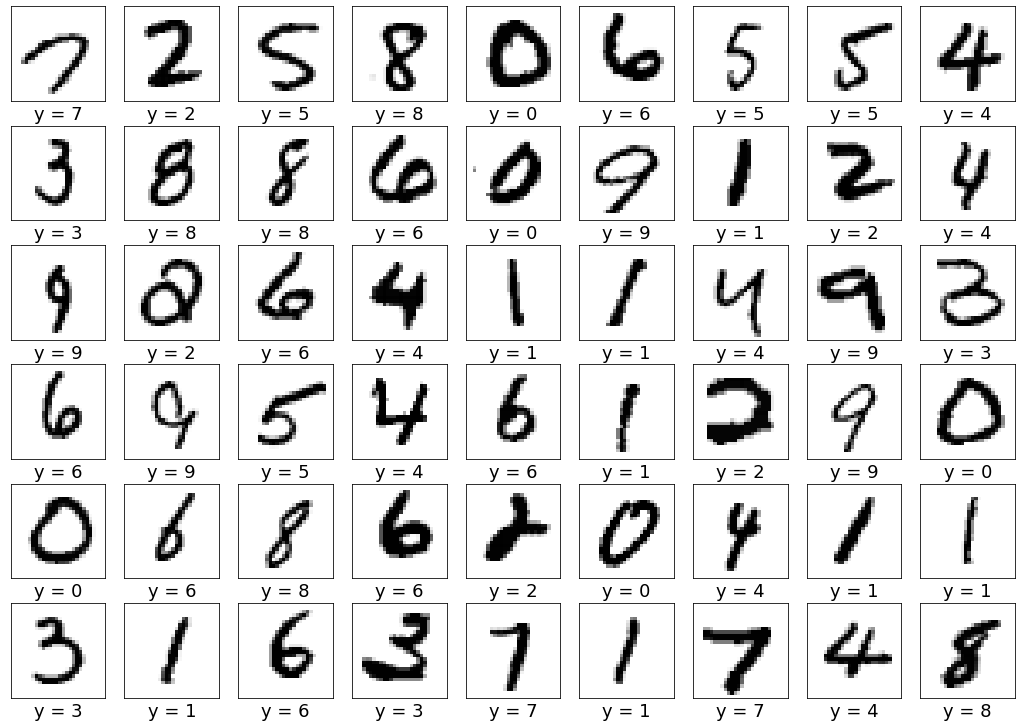

In [5]:
# Plot some images
plt.figure(figsize=(18,15))

for p in range(1,55):
    i = random.randint(0, train.shape[0])
    plt.subplot(7, 9, p)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train[i].reshape(28,28),cmap=plt.cm.binary)
    plt.xlabel("y = " + str(np.squeeze(y_train[i])), fontsize=18) 
plt.show()




# $\color{darkblue} {\text{2- Modeling: Classification problem}}$ 

#### Methods used:
**Classification** into 10 classes : 0......9
<ul>
<li>SVM</li>
<li>Logistic regression</li>
<li>Convolutionnal Neural Network
</ul>

**Metrics** to measure the error: **accuracy score**

##  SVM Training

In [8]:
from sklearn.svm import SVC

In [58]:
X_train = train.reshape(train.shape[0],-1)
print("\n")
print(f"Training set dimensions: X_train.shape")

X_test = test.reshape(test.shape[0],-1)
print(f"Test set dimensions: X_test.shape")



Training set dimensions: X_train.shape
Test set dimensions: X_test.shape


In [22]:
# Train the model
SVM_model = SVC(kernel='linear')
SVM_model.fit(X_train, y_train) 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [23]:
# Training set evaluation
SVM_yhat_train = SVM_model.predict(X_train)
print("SVM's Accuracy on training set: %.2f " % accuracy_score(y_train, SVM_yhat_train))

SVM's Accuracy on training set: 0.96 


In [24]:
# Predict
SVM_yhat_test = SVM_model.predict(X_test)

In [27]:
# Test set evaluation
print("SVM's Accuracy on test set: %.2f " % accuracy_score(y_test, SVM_yhat_test))

SVM's Accuracy on test set: 0.91 


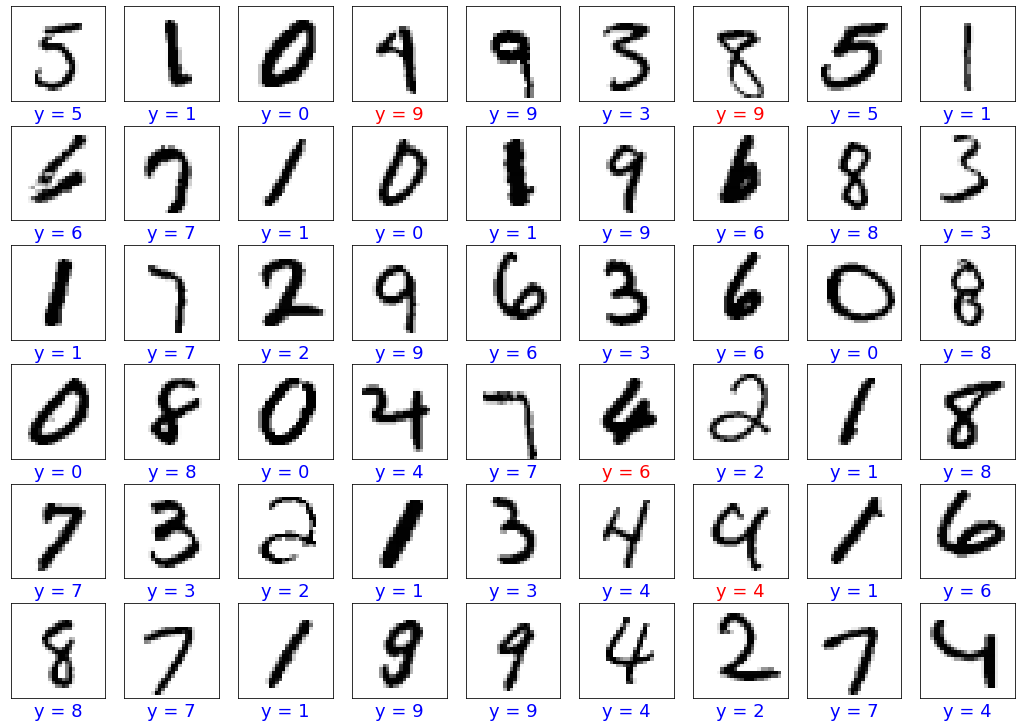

In [59]:
# Plot some test images with predicted label
plt.figure(figsize=(18,15))

for p in range(1,55):
    i = random.randint(0, X_test.shape[0])
    plt.subplot(7, 9, p)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(28,28),cmap=plt.cm.binary)
    if SVM_yhat_test[i] == y_test[i]:
        plt.xlabel("y = " + str(np.squeeze(SVM_yhat_test[i])), fontsize=18, color='b') 
    else:
        plt.xlabel("y = " + str(np.squeeze(SVM_yhat_test[i])), fontsize=18,color='r') 
plt.show()

## Logistic regression Method

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
# Train the model
LR_model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

# Predict
LR_yhat_train = LR_model.predict(X_train)

# Training set evaluation
print("Logistic Regression's Accuracy on training set: %.2f " % accuracy_score(y_train, LR_yhat_train))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression's Accuracy on training set: 0.92 


In [60]:
X_test = test.reshape(test.shape[0],-1)
print(X_test.shape)

(10000, 784)


In [61]:
# Predict test
LR_yhat_test = LR_model.predict(X_test)

# Test set evaluation
print("\n")
print("Logistic Regression's Accuracy on test set: %.2f " % accuracy_score(y_test, LR_yhat_test))



Logistic Regression's Accuracy on test set: 0.91 


## CNN Method

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras import callbacks

In [40]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print("X_train shape:", X_train.shape)
print("X_test shape", X_test.shape)

X_train shape: (60000, 28, 28, 1)
X_test shape (10000, 28, 28, 1)


#### 3-1 Model construction

In [63]:
model=Sequential([
    Conv2D(32, (5,5) , activation='relu' , input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64,(5,5), activation ='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(64,(3,3), activation ='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [64]:
callback = callbacks.EarlyStopping(monitor='loss', patience=5)

#### 3-2 Model optimizer

In [65]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#### 3-3 Model training

In [66]:
model.fit(train, y_train, epochs=50, batch_size=64, callbacks=[callback])

Epoch 1/50
938/938 [==============================] - 37s 39ms/step - loss: 0.6995 - accuracy: 0.8336
Epoch 2/50
938/938 [==============================] - 36s 38ms/step - loss: 0.1553 - accuracy: 0.9539
Epoch 3/50
938/938 [==============================] - 36s 38ms/step - loss: 0.1189 - accuracy: 0.9653
Epoch 4/50
938/938 [==============================] - 38s 40ms/step - loss: 0.0994 - accuracy: 0.9712
Epoch 5/50
938/938 [==============================] - 39s 41ms/step - loss: 0.0883 - accuracy: 0.9741
Epoch 6/50
938/938 [==============================] - 41s 44ms/step - loss: 0.0875 - accuracy: 0.9743
Epoch 7/50
938/938 [==============================] - 43s 46ms/step - loss: 0.0789 - accuracy: 0.9769
Epoch 8/50
938/938 [==============================] - 43s 46ms/step - loss: 0.0764 - accuracy: 0.9783
Epoch 9/50
938/938 [==============================] - 44s 46ms/step - loss: 0.0674 - accuracy: 0.9800
Epoch 10/50
938/938 [==============================] - 45s 48ms/step - loss: 0.063

In [69]:
# Predict test
pred = model.predict(test)
CNN_yhat_test = np.argmax(pred,axis=1)
# Test set evaluation
print("\n")
print("CNN's Accuracy on test set: %f " % accuracy_score(y_test, CNN_yhat_test))



CNN's Accuracy on test set: 0.990900 


# $\color{darkblue} {\text{3- Conclusion}}$ 

We used Mnist dataset of handwitten digits. After reading the data set, we tested 3 methods of classification: Linear regression, SVM and Convolutional Neural Network (CNN)

We learned models on a training set of 60000 images and then tested them on a test set of 10000 images. We found that the CNN method has the hight accuracy score about 99.09%